# DBSCAN - Review of test tasks

## Data: Wholesale customers Data Set


Data source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers


Description of attributes:

     1) FRESH: annual expenditure on fresh food (continuous variable);
     2) MILK: annual expenses for dairy products (continuous variable);
     3) GROCERY: annual expenditure on food products/groceries (continuous variable);
     4) FROZEN: annual expenditure on frozen food (continuous variable)
     5) DETERGENTS_PAPER: annual expenses for detergents and paper products (continuous variable)
     6) DELICATESSEN: annual expenditure on delicacies (continuous variable);
     7) CHANNEL: customer channel - Horeca food service industry (hotels/restaurants/cafes) or Retail channel (Categorical variable)
     8) REGION: client region - Lisnon, Oporto or Other (Categorical variable)
 

Source articles:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN and data clustering examples

**Complete the tasks indicated in bold:**

**Task: run ready-made cells to import libraries and load data from a file into a dataframe.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Data exploration (EDA - Exploratory Data Analysis)

**Task: Create a scatterplot plot showing the relationship between the variables MILK and GROCERY, color-coded by the Channel column.**

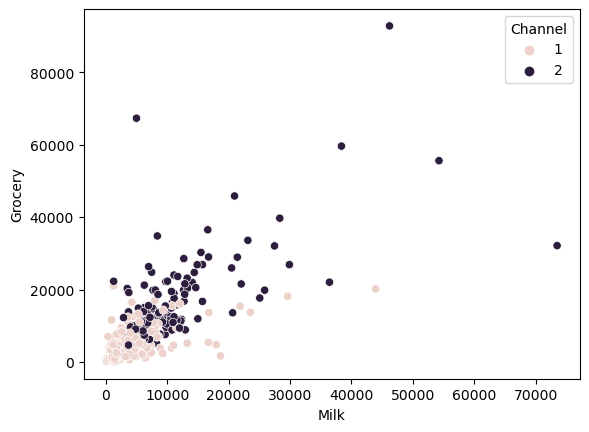

In [5]:
sns.scatterplot(data=df,x='Milk', y='Grocery', hue = 'Channel');

**Task: using seaborn, build a histogram for the MILK column, coloring with colors according to the Channel column. Can you figure out how to display different channels one "above" another ("stack"), instead of overlapping them with one channel "behind" another channel?**

In [6]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

<Axes: xlabel='Milk', ylabel='Count'>

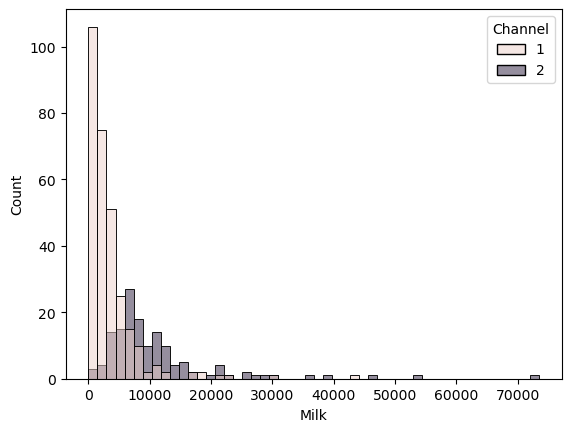

In [7]:
sns.histplot(data=df,x='Milk', hue='Channel')

**TASK: build a clustermap graph for correlations of expenses for various categories (also plot the numbers themselves).**

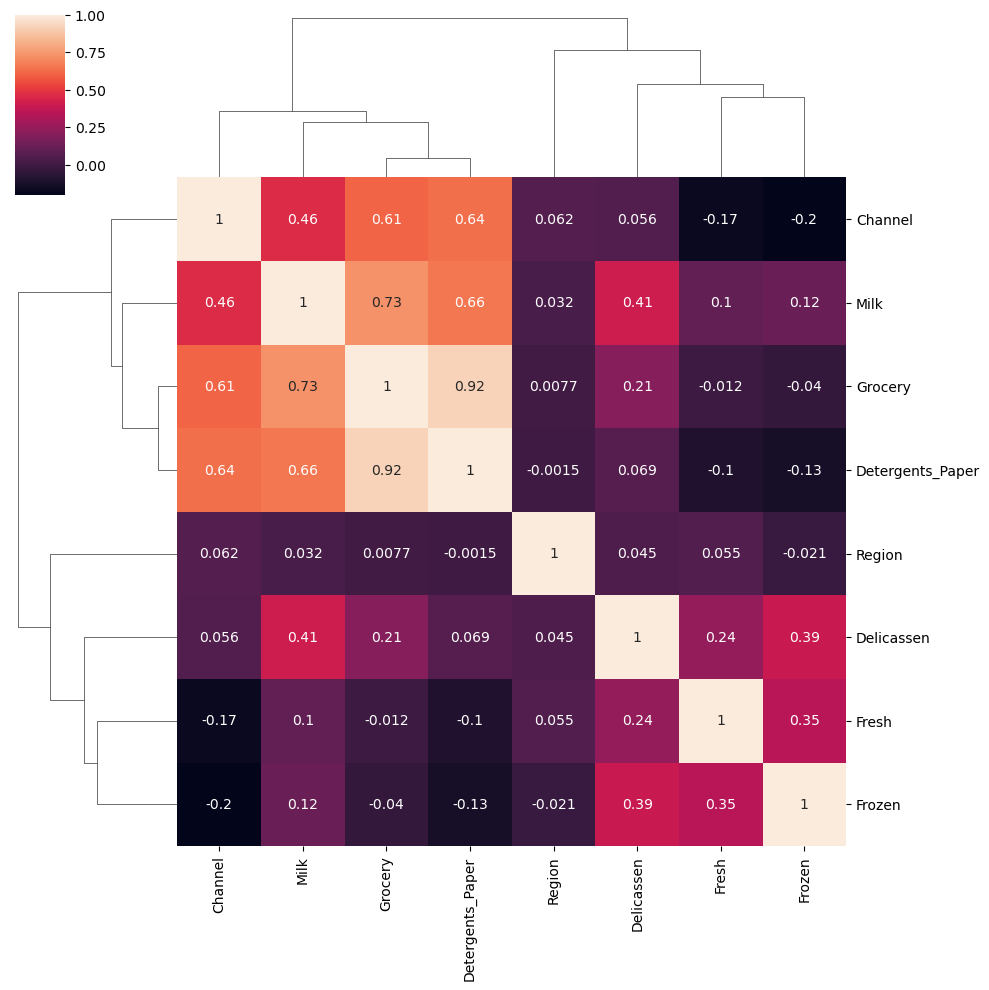

In [8]:
sns.clustermap(data=df.corr(), annot=True);

**Task: build a PairPlot plot for all columns of the dataframe, coloring the Region column in different colors.**

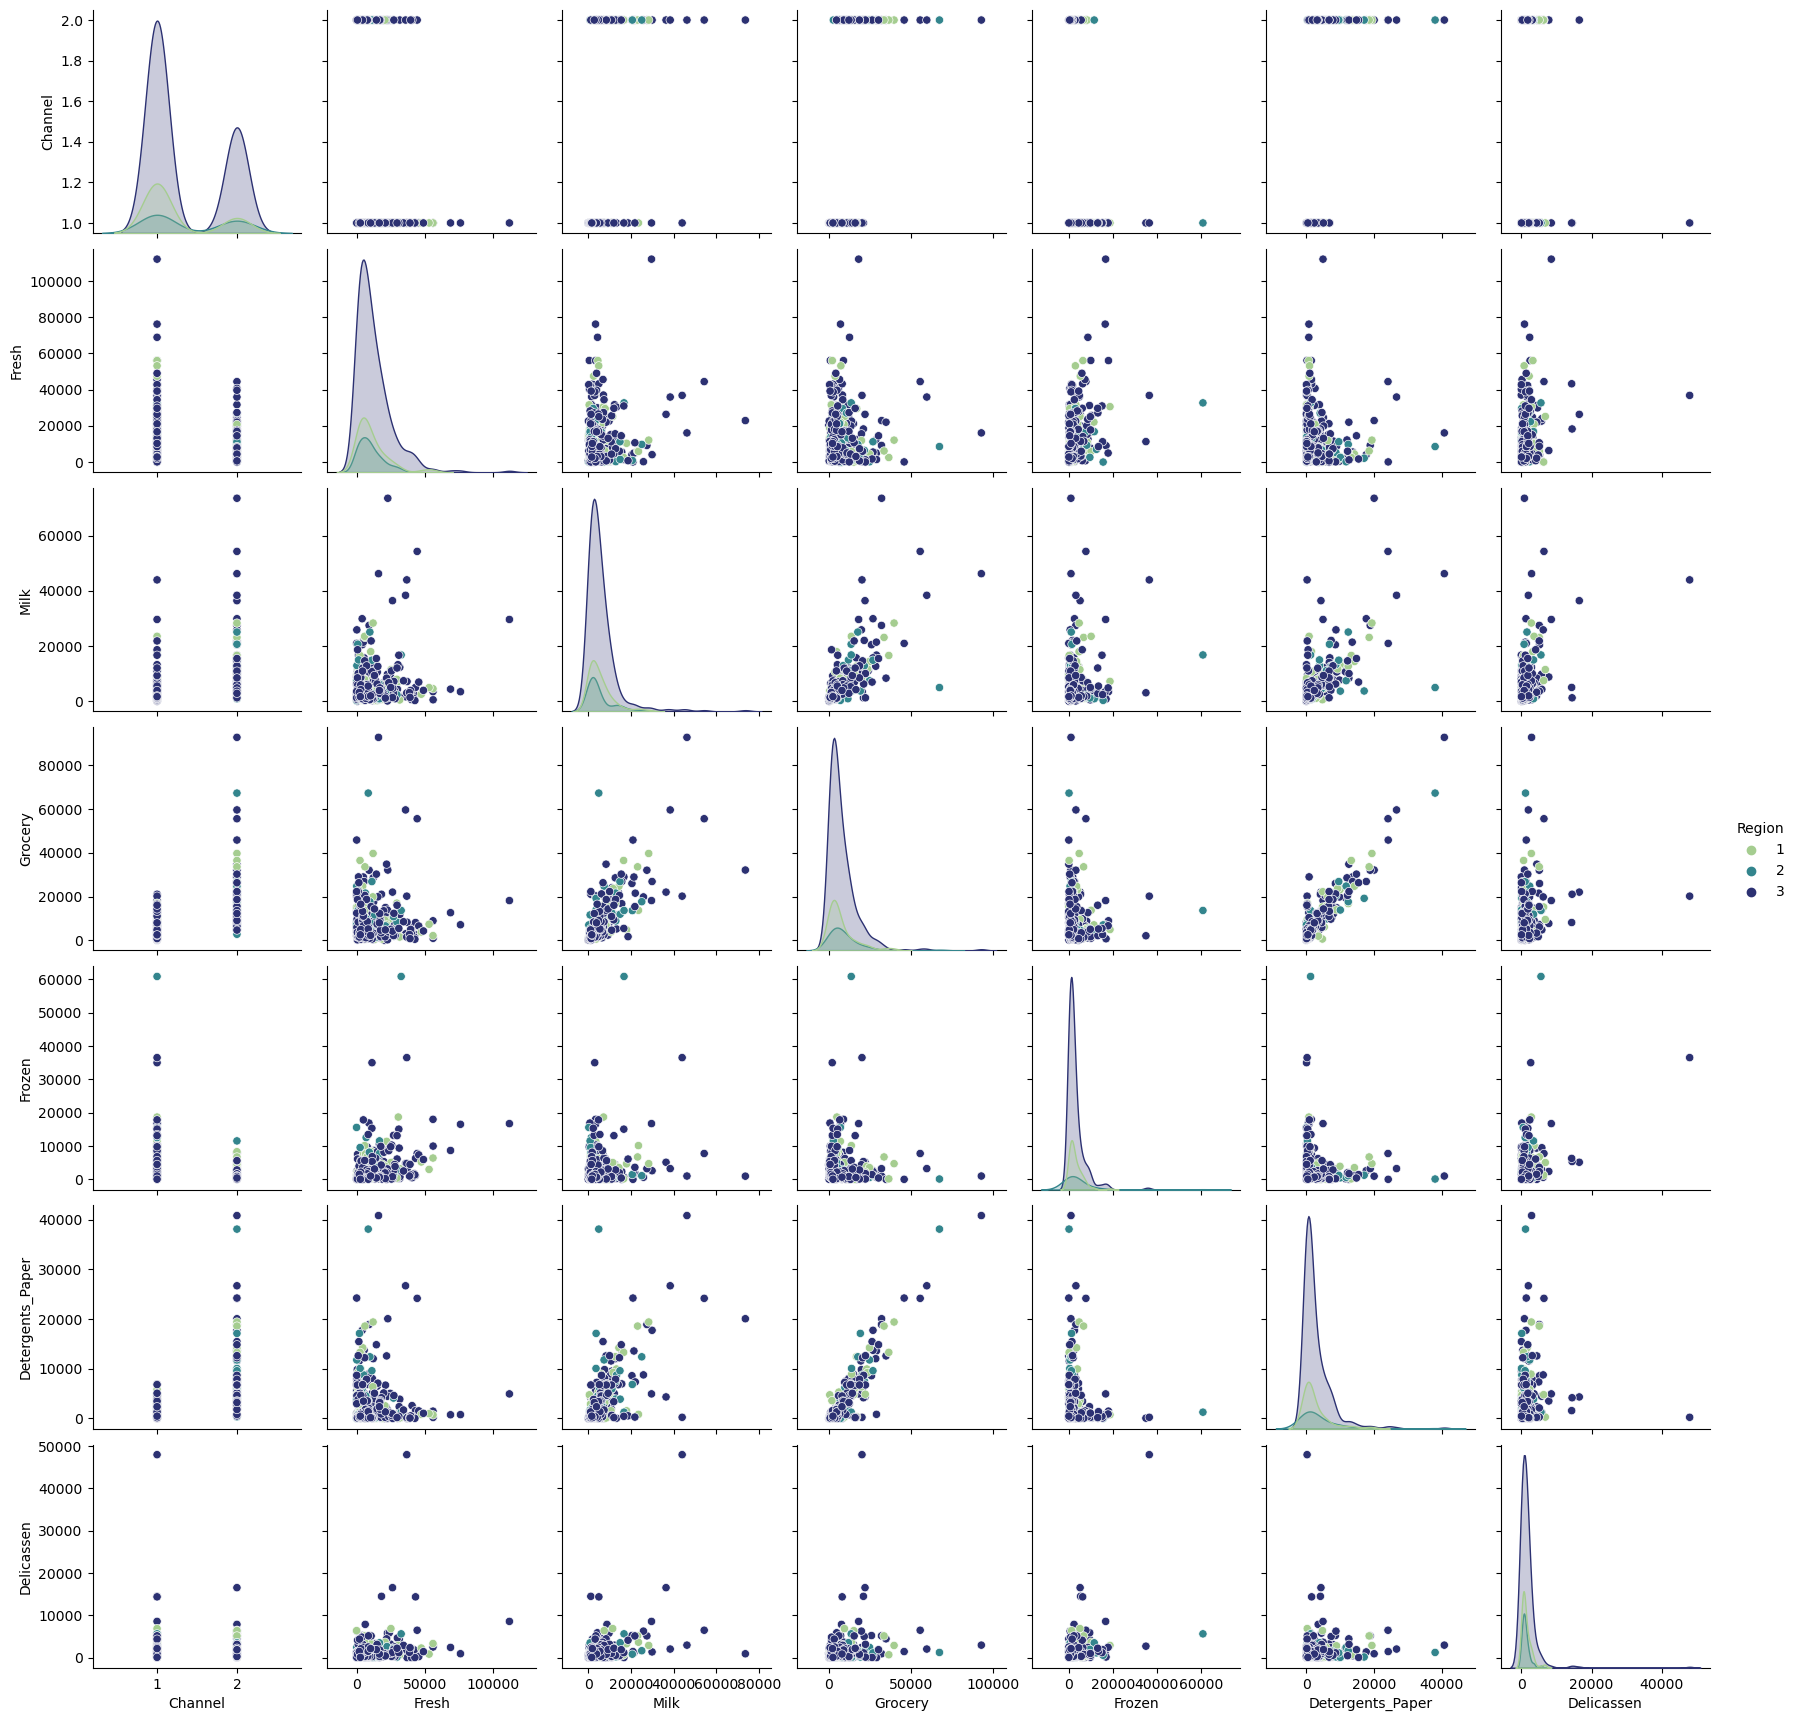

In [9]:
sns.pairplot(data=df, hue='Region',palette="crest");

##DBSCAN

**Challenge: Since different feature values have different unit scales, scale the data using StandardScaler.**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
scaled_df = scaler.fit_transform(df)

**Task: Using DBSCAN and a for loop, create a set of models for various values of the epsilon parameter. For the min_samples parameter, take the value 2 times the number of features. During the cycle, maintain the percentage of outlier points. In the solution notebook we use the following range of epsilon values:**

     np.linspace(0.001,3,50)

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
n_of_fitures = scaled_df.shape[1] * 2

In [14]:
outliers_procent = []

In [15]:
for eps in np.linspace(0.001,3,50):
    dbscan_model = DBSCAN(min_samples=n_of_fitures,eps=eps)
    dbscan_model.fit(scaled_df)
    procent = 100 * np.sum(dbscan_model.labels_== -1)/len(dbscan_model.labels_)
    outliers_procent.append(procent)

**Assignment: Construct a lineplot for the percentage of outlier points as a function of epsilon values.**

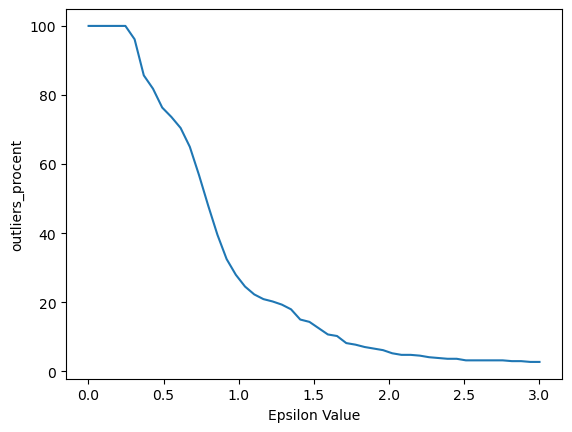

In [16]:
sns.lineplot(y=outliers_procent,x=np.linspace(0.001,3,50))
plt.ylabel('outliers_procent')
plt.xlabel('Epsilon Value');

## DBSCAN for the selected epsilon value

**Task: Based on the graphics in the previous task, create a DBSCAN model with the epsilon value of your choice. In our solutions we used eps=2.**

In [17]:
dbscan_model = DBSCAN(min_samples=n_of_fitures,eps=2)
dbscan_model.fit(scaled_df)

DBSCAN(eps=2, min_samples=16)

**Task: build a scatterplot for the Milk and Grocery columns, coloring the data in different colors based on the results of the DBSCAN model.**

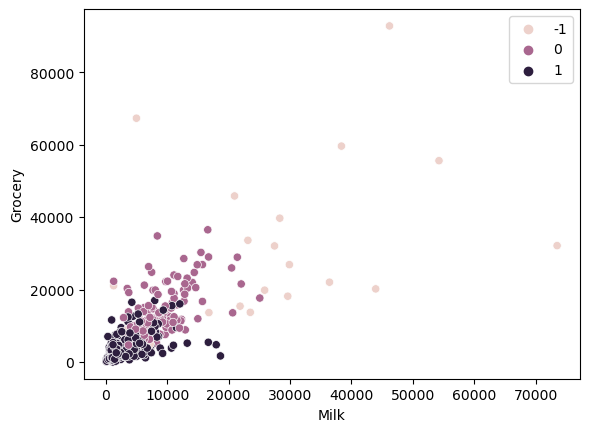

In [18]:
sns.scatterplot(data=df,x='Milk', y='Grocery', hue = dbscan_model.labels_);

**TASK: Create a scatterplot for the Milk and Detergents Paper columns using different colors based on the results of the DBSCAN model.**

In [19]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

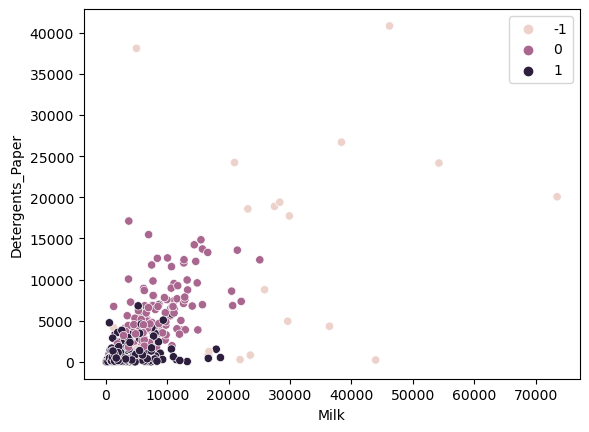

In [20]:
sns.scatterplot(data=df,x='Milk', y='Detergents_Paper', hue = dbscan_model.labels_);

**Task: create a new column in the source dataframe, name this column “Labels” and write the results of the DBSCAN model into it - the labels values.**

In [21]:
df['Label']=dbscan_model.labels_

**Task: calculate the average costs for various categories, and separately for each of the clusters (including cluster -1 for emissions). Compare the expenses of different clusters with each other (for individual expense categories).**

In [35]:
mean_df = df.drop(['Channel','Region'], axis=1).groupby('Label').mean()

In [36]:
mean_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Label,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


**Task: normalize the data table obtained in the previous task using MinMaxScaler - so that the values ​​change in the range from 0 to 1. After this, build a heatmap for the resulting values.**

In [28]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [39]:
scaled_df = minmax_scaler.fit_transform(mean_df)

<Axes: ylabel='Label'>

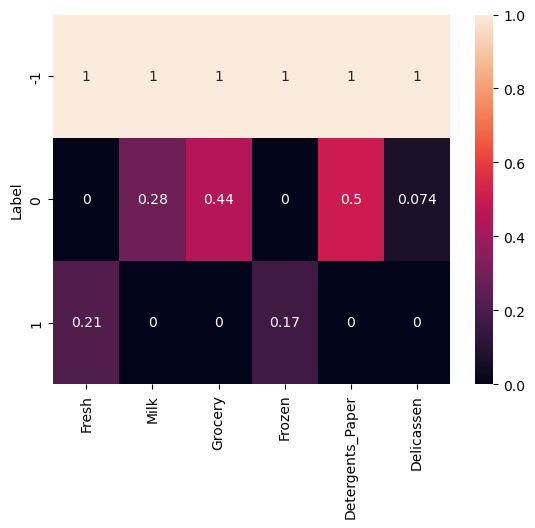

In [54]:
sns.heatmap(pd.DataFrame(scaled_df,mean_df.index, mean_df.columns),annot=True)

**Task: build another heat map - the same as in the previous task, but this time remove outliers from consideration first.**

<Axes: ylabel='Label'>

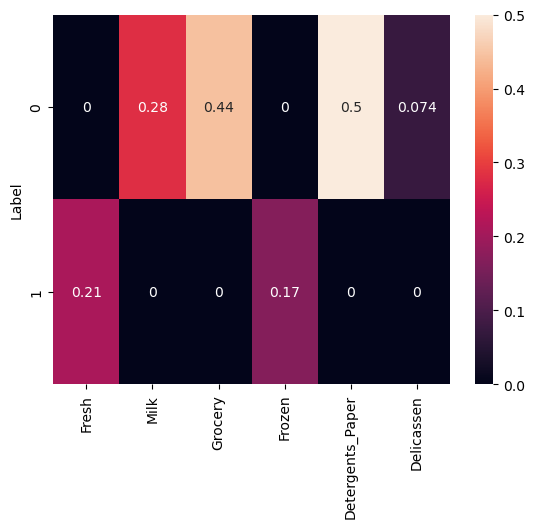

In [55]:
sns.heatmap(pd.DataFrame(scaled_df,mean_df.index, mean_df.columns).loc[[0,1]],annot=True)